
# 🌟 Auto-document your work with Vectice - Tutorial Probability of Default Notebook

This Vectice Tutorial notebook illustrates how to use Vectice auto-documentation features in a realistic business scenario. We will follow a classic but simplified model training flow to quickly show how Vectice can help you automate your **Model Documentation**.

<div class="alert" style="color: #383d41; background-color: #e2e3e5; border-color: #d6d8db" role="alert">
<b> This tutorial showcases a documentation-only project with a single phase as a great way to get started. You also have the ability to define more complex project structures to organize your work in multiple phases and facilitate cross-functional collaboration.</b>
</div>

### Pre-requisites:
Before using this notebook you will need:
* An account in Vectice
* An API key to connect to Vectice through the APIs


### Other Resources
*   Vectice Documentation: https://docs.vectice.com/ </br>
*   Vectice API documentation: https://api-docs.vectice.com/

## Install the latest Vectice Python client library

In [ ]:
%pip install -q vectice -U

## Imports

In [1]:
import numpy as np
import pandas as pd
import json

from sklearn.preprocessing import LabelEncoder

import os
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
#Download the data
!wget https://vectice-examples.s3.us-west-1.amazonaws.com/Samples+Data/tutorial_data.csv -q --no-check-certificate

## 🌟 Get started by configuring the Vectice autolog

**First, we need to authenticate to the Vectice app:**

- Visit the Vectice app to create and copy an API key (cf. https://docs.vectice.com/getting-started/create-an-api-key)

- Paste the API key in the code below



In [ ]:
import vectice
from vectice import autolog

autolog.config(api_token="7bOJe5EG5.VQyk8PgwBD40LNvx2mA3q7bOJe5EG5dM91ejznrpJVKRXWo6ZY", #Paste your API key
  host = 'https://trial.vectice.com',  #Paste your host information
  phase = 'PHA-XXX', #Paste your Phase Id
  prefix = 'mdd') # Optional: a prefix for asset names


<div class="alert" style="color: #383d41; background-color: #e2e3e5; border-color: #d6d8db" role="alert">
<b> Important information:</b>
<li> Vectice Autolog is continuously evolving and we are actively enhancing supported libraries, environments, and functionalities to provide an improved user experience. 
<li> Be sure to <b>configure autolog at the beginning of your notebook</b>. A late setup may require rerunning previous cells.
<br>

For detailed information, <b>supported libraries and environments</b>, please consult our [Autolog documentation](https://api-docs.vectice.com/reference/vectice/autolog/).
</div>

## (Optional) Retrieve from Vectice the list of requirements needed to complete your documentation directly from your notebook

In [ ]:
requirements = autolog.get_connection().browse('your-phase-id').list_requirements(display_print=True) # Paste your Phase Id same as in the previous cell

Phase 'Model Development Document' successfully retrieved.

For quick access to the Phase in the Vectice web app, visit:
https://qa.vectice.com/browse/phase/PHA-9859


There are 2 requirements in the phase 'Model Development Document' and a maximum of 10 requirements are displayed in the table below:



 Title                                                          ┃ Description                                           
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
 Notebook steps to properly populate your report                │ Build your training and testing dataset               
                                                                │ Comment your feature engineering                      
                                                                │ Build your model                                      
 Additional assets needed inside your notebook                  │ Feature importance graph with "importance" in the     
                                                                │ file name                                             
                                                                │ Performance graphs with "performance" in the file     
                                                                │ name


For quick access to the phase requirements in the Vectice web app, visit:
https://qa.vectice.com/phase/PHA-9859/requirements




# Start Your Regular Data Science Work -> Not specific to Vectice

In this notebook, we will work on predicting the probability of loan default using a simplified yet complete data science workflow. Here's the plan:

- Dataset Loading: 
  - Load a dataset containing information about loan default applications.
  - Select a subset of the data.
- Data Preparation:
  - Perform small feature engineering tasks.
  - Apply scaling to the features.
- Model Building and Evaluation:
  - Build a logistic regression model to predict the probability of loan default.
  - Evaluate the results of the model.



## Dataset Loading

In [5]:
from sklearn.model_selection import train_test_split

selected_columns = ['SK_ID_CURR','AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','CNT_CHILDREN','CNT_FAM_MEMBERS',
           'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH', 'EXT_SOURCE_2', 'EXT_SOURCE_3', "NAME_INCOME_TYPE", "TARGET"]

# Training data
path_train = "./tutorial_data.csv"
application_cleaned_baseline = pd.read_csv(path_train)[selected_columns]
app_train_feat, app_test_feat = train_test_split(application_cleaned_baseline, test_size=0.15, random_state=42)




### Split the data

In [6]:

# Separate the target variable from the testing set

target_variable = 'TARGET'
app_test_feat_target = app_test_feat[target_variable]
app_test_feat = app_test_feat.drop(target_variable, axis=1)

# Print the shapes of the resulting dataframes
print('Training data shape: ', app_train_feat.shape)
print('Testing shape: ', app_test_feat.shape)
print('Testing target shape: ', app_test_feat_target.shape)

Training data shape:  (119840, 15)
Testing shape:  (21149, 14)
Testing target shape:  (21149,)


In [7]:
app_train_feat

,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,NAME_INCOME_TYPE,TARGET
18653,121749,36459.0,755190.0,180000.0,675000.0,2,4.0,31,1744,389.0,1881,0.736804,0.656158,Working,0
10918,112711,14652.0,206059.5,90000.0,166500.0,0,1.0,53,1109,3631.0,2010,0.728145,NaN,Commercial associate,0
110177,227791,13842.0,127350.0,225000.0,112500.0,1,3.0,37,4557,4535.0,3984,0.539038,0.109626,Working,0
113497,231627,41215.5,1494000.0,472500.0,1494000.0,0,2.0,52,3413,1774.0,1166,0.558043,0.304672,Working,0
67086,177795,22351.5,398016.0,135000.0,360000.0,0,2.0,57,365243,5218.0,3314,0.599026,0.542445,Pensioner,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,227897,13500.0,270000.0,202500.0,270000.0,2,4.0,43,104,5622.0,330,0.767108,0.372334,Working,0
119879,239009,32602.5,675000.0,121500.0,675000.0,0,1.0,39,1124,3813.0,4134,0.617180,NaN,Working,0
103694,220345,41463.0,1503000.0,202500.0,1503000.0,0,2.0,49,1557,8992.0,1651,0.656705,NaN,Working,0
131932,253016,33025.5,1125000.0,450000.0,1125000.0,0,1.0,39,5929,5038.0,5123,0.608427,0.554947,Working,0


# Data preparation

### One-Hot Encoding

In [8]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

for col in app_train_feat:
    if app_train_feat[col].dtype == 'object':
        if len(list(app_train_feat[col].unique())) <= 2:
            le.fit(app_train_feat[col])
            app_train_feat[col] = le.transform(app_train_feat[col])
            app_test_feat[col] = le.transform(app_test_feat[col])

            le_count += 1

print('%d columns were label encoded.' % le_count)

0 columns were label encoded.


In [9]:
# one-hot encoding of categorical variables
app_train_feat = pd.get_dummies(app_train_feat)
app_test_feat = pd.get_dummies(app_test_feat)
train_labels = app_train_feat['TARGET']

app_train_feat, app_test_feat = app_train_feat.align(app_test_feat, join = 'inner', axis = 1)

app_train_feat['TARGET'] = train_labels


app_train_feat['DAYS_EMPLOYED_ANOM'] = app_train_feat["DAYS_EMPLOYED"] == 365243

app_train_feat['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)


app_test_feat['DAYS_EMPLOYED_ANOM'] = app_test_feat["DAYS_EMPLOYED"] == 365243
app_test_feat["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)
print('Training Features shape: ', app_train_feat.shape)
print('Testing Features shape: ', app_test_feat.shape)
print('There are %d anomalies in the test data out of %d entries' % (app_test_feat["DAYS_EMPLOYED_ANOM"].sum(), len(app_test_feat)))

Training Features shape:  (119840, 20)
Testing Features shape:  (21149, 19)
There are 3769 anomalies in the test data out of 21149 entries


## Scaling and missing Data handling

### Define the feature list - drop target and fit data

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Drop the target from the training data
if 'TARGET' in app_train_feat:
    train_no_missing = app_train_feat.drop(columns=['TARGET'])

# Separate 'SK_ID_CURR'
train_ids = train_no_missing['SK_ID_CURR']
test_ids = app_test_feat['SK_ID_CURR']

# Drop 'SK_ID_CURR' from the features list
train_no_missing = train_no_missing.drop(columns=['SK_ID_CURR'])
test_no_missing = app_test_feat.drop(columns=['SK_ID_CURR'])

# Define the features list without 'SK_ID_CURR'
features = list(train_no_missing.columns)

# Median imputation of missing values
imputer = SimpleImputer(strategy='median')
# Fit on the training data
imputer.fit(train_no_missing)

# Transform both training and testing data
train_no_missing = pd.DataFrame(imputer.transform(train_no_missing), columns=features)
test_no_missing = pd.DataFrame(imputer.transform(test_no_missing), columns=features)

# Standardize the features
scaler = StandardScaler()
# Fit on the training data
scaler.fit(train_no_missing)

# Transform both training and testing data
train_no_missing = pd.DataFrame(scaler.transform(train_no_missing), columns=features)
test_no_missing = pd.DataFrame(scaler.transform(test_no_missing), columns=features)

# Reattach 'SK_ID_CURR' to the DataFrames
train_no_missing['SK_ID_CURR'] = train_ids.values
test_no_missing['SK_ID_CURR'] = test_ids.values

# Set 'SK_ID_CURR' as the index
train_no_missing = train_no_missing.set_index('SK_ID_CURR')
test_no_missing = test_no_missing.set_index('SK_ID_CURR')

# Display the first few rows of the transformed training data
print(train_no_missing.head())
print(test_no_missing.head())

            AMT_ANNUITY  AMT_CREDIT  AMT_INCOME_TOTAL  AMT_GOODS_PRICE  \
SK_ID_CURR                                                               
121749         0.644573    0.387763          0.031120         0.369729   
112711        -0.855855   -0.974421         -0.224359        -1.004173   
227791        -0.911587   -1.169670          0.158859        -1.150074   
231627         0.971844    2.220470          0.861426         2.582562   
177795        -0.326092   -0.498250         -0.096620        -0.481361   

            CNT_CHILDREN  CNT_FAM_MEMBERS  DAYS_BIRTH  DAYS_EMPLOYED  \
SK_ID_CURR                                                             
121749          2.193229         2.027064   -1.035503      -0.234636   
112711         -0.579630        -1.270135    0.803345      -0.532329   
227791          0.806799         0.927997   -0.533999       1.084120   
231627         -0.579630        -0.171069    0.719761       0.547804   
177795         -0.579630        -0.171069    1.13

# Model building and evaluation
### Logistic Regression Model

ROC AUC Score: 0.7292598143943803
F1 Score: 0.2672732442422519
Recall Score: 0.5383734249713631


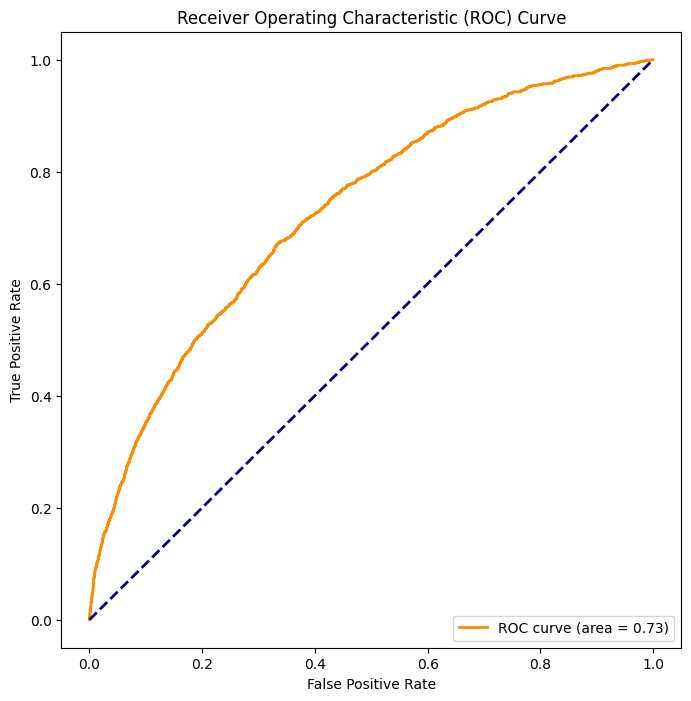

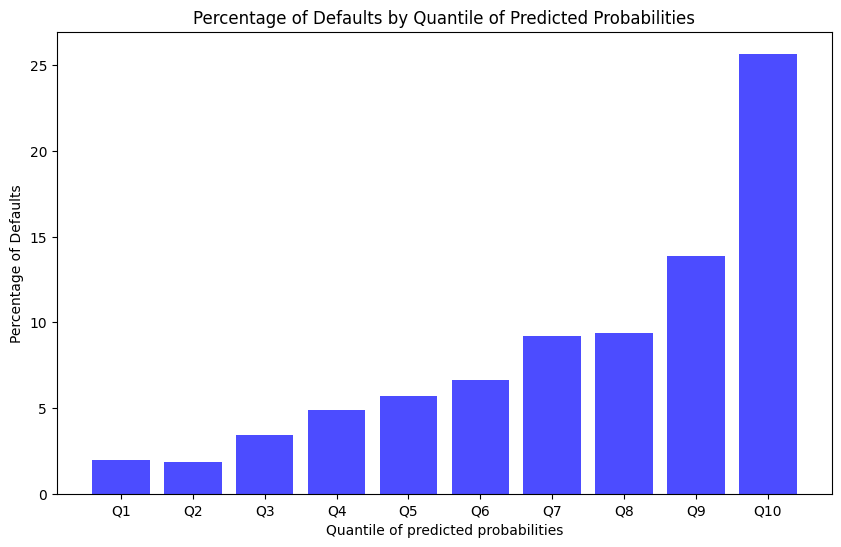

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Build a logistic regression model
# Define and train the logistic regression model
logistic_regression = LogisticRegression(random_state=50, solver='liblinear', max_iter=1000)
features = list(train_no_missing.columns)
# Train on the training data
logistic_regression.fit(train_no_missing, train_labels)

# Make predictions on the test data
predictions = logistic_regression.predict_proba(test_no_missing)[:, 1]

# Evaluate the model
roc_auc = roc_auc_score(app_test_feat_target.values, predictions)

sorted_indices = np.argsort(predictions)[::-1]
sorted_labels = app_test_feat_target.iloc[sorted_indices]

desired_percentage = 0.25

threshold_index = int(desired_percentage * len(predictions))
threshold_probability = predictions[sorted_indices[threshold_index]]
binary_predictions = (predictions >= threshold_probability).astype(int)

# Calculate the recall at the desired percentage
recall = recall_score(app_test_feat_target.values, binary_predictions)
f1 = f1_score(app_test_feat_target.values, binary_predictions)

# Print metrics
metric = {"auc": float(roc_auc),
          f"recall at {desired_percentage}%": float(recall),
          f"f1_score at {desired_percentage}%": float(f1)}

print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1)
print("Recall Score:", recall)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(app_test_feat_target.values, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig("Performance_roc_curve.png")
plt.show()

# Create a DataFrame with predicted probabilities and true labels
df_results = pd.DataFrame({'Probability': predictions, 'Default': app_test_feat_target.values})

# Sort instances based on predicted probabilities
df_results = df_results.sort_values(by='Probability', ascending=False)

# Divide the sorted instances into quantiles (e.g., deciles)
num_quantiles = 10
df_results['Quantile'] = pd.qcut(df_results['Probability'], q=num_quantiles, labels=False, duplicates='drop')

# Calculate the percentage of defaults in each quantile
quantile_defaults = df_results.groupby('Quantile')['Default'].mean() * 100
del df_results #To not be captured by autolog
# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(quantile_defaults.index, quantile_defaults.values, color='blue', alpha=0.7)
plt.xlabel('Quantile of predicted probabilities')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of Defaults by Quantile of Predicted Probabilities')
plt.xticks(ticks=quantile_defaults.index, labels=[f'Q{i + 1}' for i in quantile_defaults.index])
plt.savefig("Performance_Percentage_of_Defaults_by_Quantile.png")
plt.show()


### Feature importance

In [12]:
def plot_feature_importance(model, column_names):
    # Extract feature importance (coefficients) and their absolute values
    coefficients = model.coef_[0]
    feature_importance = np.abs(coefficients)

    # Create a DataFrame for easier visualization
    importance_df = pd.DataFrame({
        'Feature': column_names,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
    plt.gca().invert_yaxis()  # Reverse the order for better visualization
    plt.title('Feature Importance in Logistic Regression')
    plt.xlabel('Importance (Absolute Coefficient Value)')
    plt.ylabel('Feature')

    # Adjust layout to avoid cutting labels
    plt.tight_layout()
    plt.savefig('Feature Importance.png')
    plt.show()

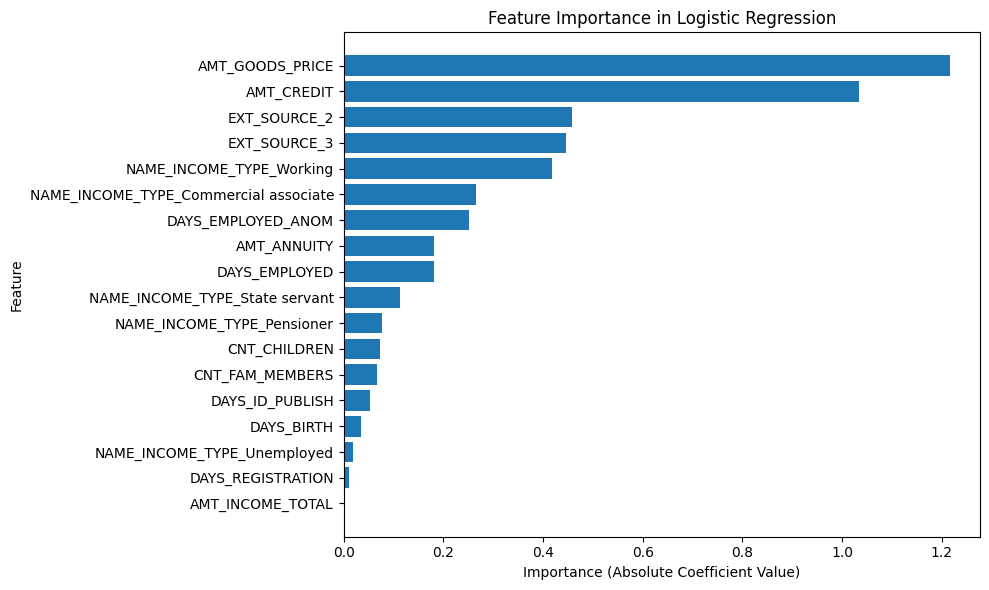

In [13]:
plot_feature_importance(logistic_regression, train_no_missing.columns)

# 🌟 Once done with your regular data science work -> Autolog your entire notebook
**With one single line of code Autolog all your assets (Model, Dataset, Graphs, Notes, Test Results).**

In [14]:
autolog.notebook(note= "Baseline model logistic regression", capture_schema_only=False)

New Iteration 'Iteration 1' created.

For quick access to the Iteration in the Vectice web app, visit:
https://qa.vectice.com/browse/iteration/ITR-10264
File: ./tutorial_data.csv wrapped successfully.
Note logged in iteration 'Iteration 1'.
Dataset 'mdd-application_cleaned_baseline' logged in iteration 'Iteration 1'.
Dataset 'mdd-app_train_feat' logged in iteration 'Iteration 1'.
Dataset 'mdd-app_test_feat' logged in iteration 'Iteration 1'.
Dataset 'mdd-train_no_missing' logged in iteration 'Iteration 1'.
Dataset 'mdd-test_no_missing' logged in iteration 'Iteration 1'.
Model 'mdd-logistic_regression' logged in iteration 'Iteration 1'.
Graph 'Performance_roc_curve.png' logged in iteration 'Iteration 1'.
Graph 'Performance_Percentage_of_Defaults_by_Quantile.png' logged in iteration 'Iteration 1'.
Graph 'Feature Importance.png' logged in iteration 'Iteration 1'.


#### You have logged your assets to Vectice with a single line of code.

**Note**: Vectice also offers a full API to wrap any assets you want to log and give you more control: https://api-docs.vectice.com/<br>

## 🥇 Congrats! You have learned how to successfully use Vectice to autolog your work in one line of code.<br> Easy right?<br>
# 🌟You can proceed back to the Vectice app to auto-document your work.
